# Frequency & Exposure

- dataset A

In [1]:
import os
from IPython.display import display, HTML

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

look into folder

In [3]:
folders = f"{os.getcwd()}".split('/')[:-1]
folders.extend(['datasets', 'A', 'Archive', 'train.csv'])
path = os.path.join(*folders)
path = '/'+path
print(path)

/Users/school/Desktop/Github Repositories/CSE-5099/datasets/A/Archive/train.csv


In [4]:
train_df = pd.read_csv(
    filepath_or_buffer= path
)
print(train_df.shape)

display(HTML(train_df[:10].to_html()))

(1200000, 21)


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0
5,5,29.0,Male,45963.0,Married,1.0,Bachelor's,NaN,33.053198,Urban,Premium,2.0,4.0,614.0,5.0,2022-05-20 15:21:39.207847,Average,No,Weekly,House,3202.0
6,6,41.0,Male,40336.0,Married,0.0,PhD,NaN,NaN,Rural,Basic,2.0,8.0,807.0,6.0,2020-02-21 15:21:39.219432,Poor,No,Weekly,House,439.0
7,7,48.0,Female,127237.0,Divorced,2.0,High School,Employed,5.769783,Suburban,Comprehensive,1.0,11.0,398.0,5.0,2022-08-08 15:21:39.181605,Average,No,Rarely,Condo,111.0
8,8,21.0,Male,1733.0,Divorced,3.0,Bachelor's,NaN,17.869551,Urban,Premium,1.0,10.0,685.0,8.0,2020-12-14 15:21:39.198406,Average,No,Monthly,Condo,213.0
9,9,44.0,Male,52447.0,Married,2.0,Master's,Employed,20.473718,Urban,Comprehensive,1.0,9.0,635.0,3.0,2020-08-02 15:21:39.144722,Poor,No,Daily,Condo,64.0


### Null values?

In [5]:
for col in train_df.columns:
    if train_df[col].isnull().any() == True:
        print(f"{col}: has null values")

Age: has null values
Annual Income: has null values
Marital Status: has null values
Number of Dependents: has null values
Occupation: has null values
Health Score: has null values
Previous Claims: has null values
Vehicle Age: has null values
Credit Score: has null values
Insurance Duration: has null values
Customer Feedback: has null values


In [6]:
numerical_cols = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration']
for col in numerical_cols:    
    train_df[col] = train_df[col].fillna(
        value= train_df[col].mean()
    )

In [7]:
categorical_cols = ['Marital Status', 'Occupation', 'Customer Feedback']

for col in categorical_cols:
    print(train_df[col].unique())

for col in categorical_cols:
    train_df[col].fillna(
        value= 'OTHER', 
        inplace=True
    )

['Married' 'Divorced' 'Single' nan]
['Self-Employed' nan 'Employed' 'Unemployed']
['Poor' 'Average' 'Good' nan]


/var/folders/5q/8m769tvj6gv4zvr_fp0tbkx40000gp/T/ipykernel_39078/65296393.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(


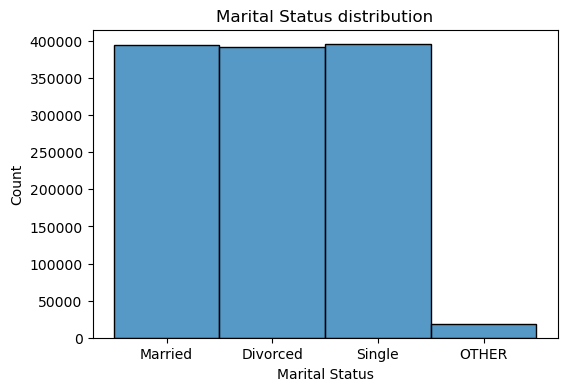

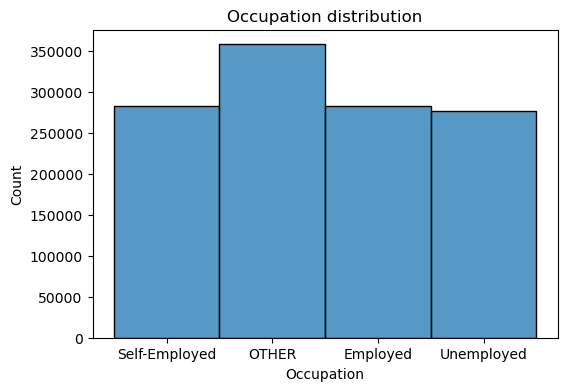

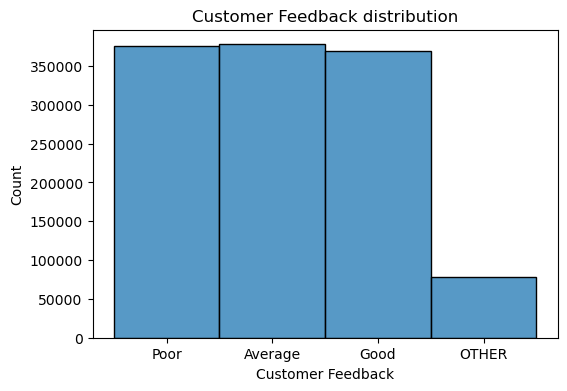

In [8]:
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(
        data= train_df[col],
    )    
    plt.title(f'{col} distribution')
    plt.show()

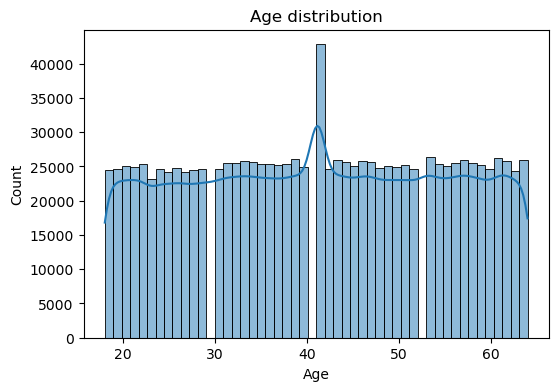

In [9]:
col, bins = 'Age', 50

plt.figure(figsize=(6, 4))
plt.title(f'{col} distribution')
sns.histplot(
    data= train_df[col],
    bins= bins,
    kde=True
)
plt.show()

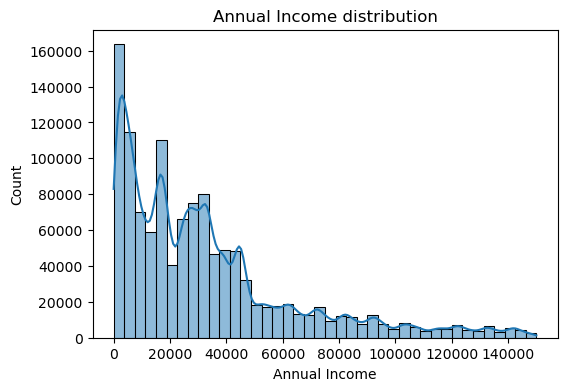

In [10]:
col, bins = 'Annual Income', 40

plt.figure(figsize=(6, 4))
plt.title(f'{col} distribution')
sns.histplot(
    data= train_df[col],
    bins= bins,
    kde=True
)
plt.show()

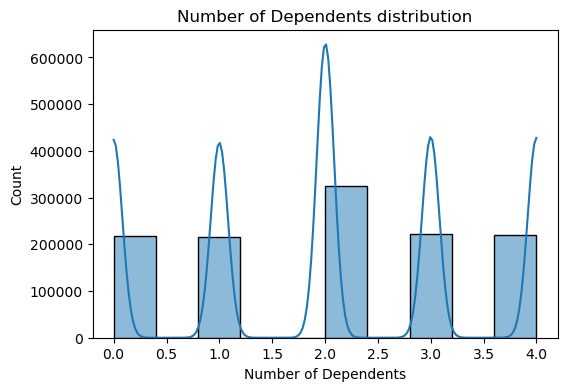

In [11]:
col, bins = 'Number of Dependents', 10

plt.figure(figsize=(6, 4))
plt.title(f'{col} distribution')
sns.histplot(
    data= train_df[col],
    bins= bins,
    kde=True
)
plt.show()

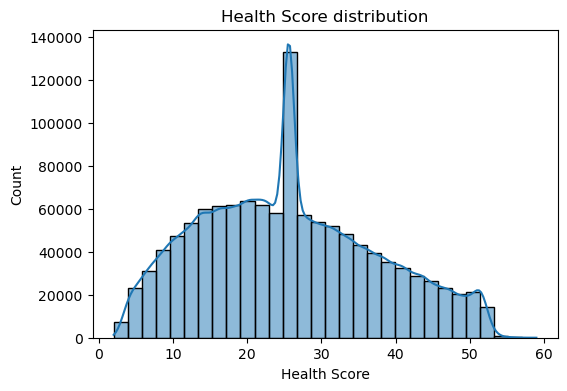

In [12]:
col, bins = 'Health Score', 30

plt.figure(figsize=(6, 4))
plt.title(f'{col} distribution')
sns.histplot(
    data= train_df[col],
    bins= bins,
    kde=True
)
plt.show()

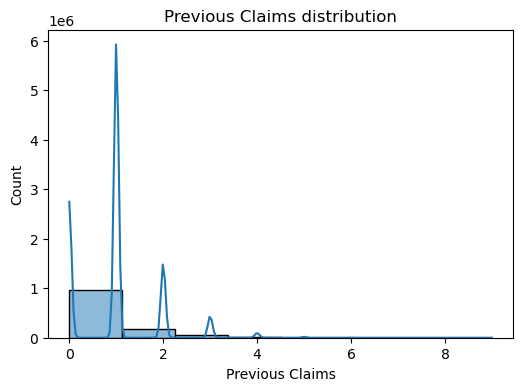

In [13]:
col, bins = 'Previous Claims', 8

plt.figure(figsize=(6, 4))
plt.title(f'{col} distribution')
sns.histplot(
    data= train_df[col],
    bins= bins,
    kde=True
)
plt.show()

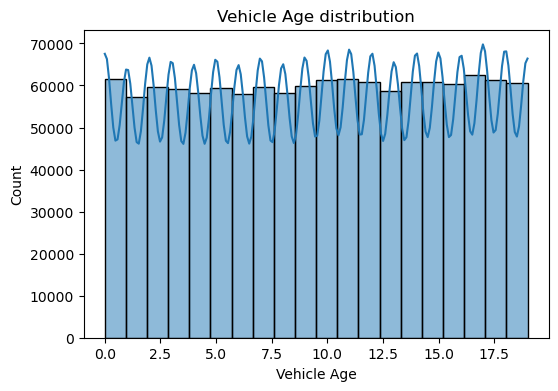

In [14]:
col, bins = 'Vehicle Age', 20

plt.figure(figsize=(6, 4))
plt.title(f'{col} distribution')
sns.histplot(
    data= train_df[col],
    bins= bins,
    kde=True
)
plt.show()

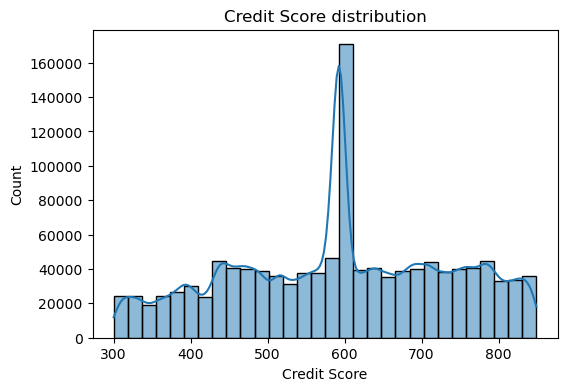

In [15]:
col, bins = 'Credit Score', 30

plt.figure(figsize=(6, 4))
plt.title(f'{col} distribution')
sns.histplot(
    data= train_df[col],
    bins= bins,
    kde=True
)
plt.show()

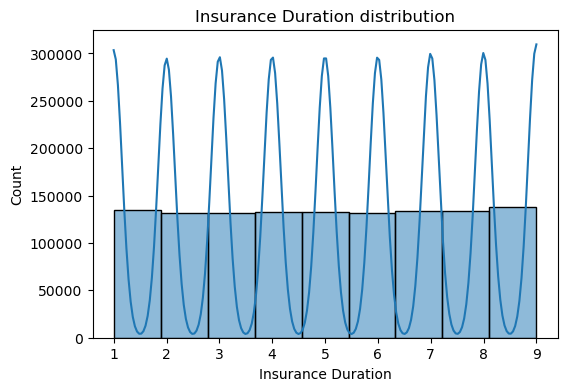

In [16]:
col, bins = 'Insurance Duration', 9

plt.figure(figsize=(6, 4))
plt.title(f'{col} distribution')
sns.histplot(
    data= train_df[col],
    bins= bins,
    kde=True
)
plt.show()

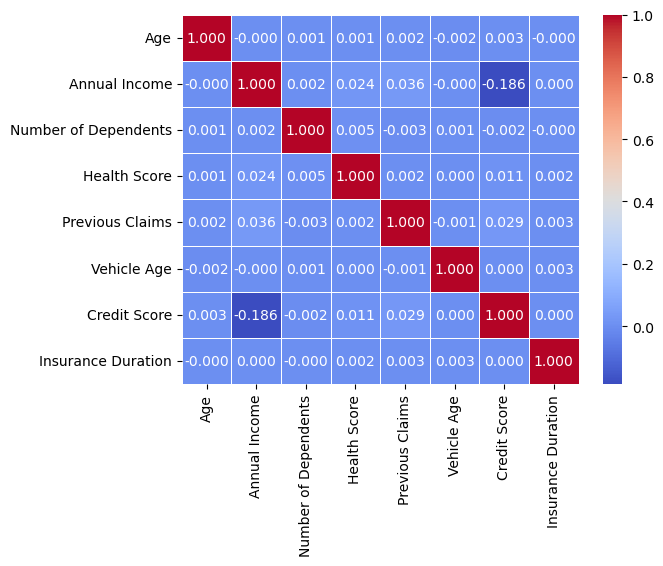

In [28]:
numerical_df = train_df[numerical_cols]
correlations = numerical_df.corr(
    method= 'pearson'
)

sns.heatmap(
    data = correlations,
    annot= True,
    cmap="coolwarm",
    fmt=".3f",
    linewidths=0.5
)
plt.show()

## Frequency and Severity

freq = (claims)/(duration)



severity = (total claim cost)/(# of claims)

In [ ]:
train_df['Freq'] = train_df['Previous Claims'] / train_df['Insurance Duration']
# train_df['S'] = train_df['Premium Amount'] / 1

In [ ]:
display(HTML(train_df[['Freq']][:10].to_html()))

,Freq
0,0.400000
1,0.500000
2,0.333333
3,1.000000
4,0.000000
5,0.400000
6,0.333333
7,0.200000
8,0.125000
9,0.333333


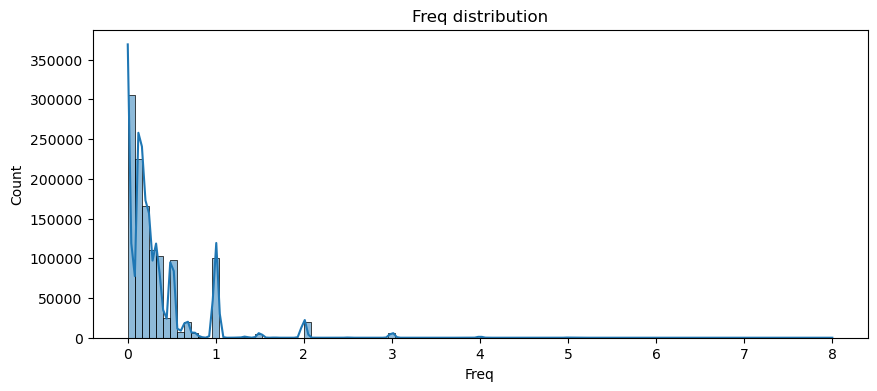

In [ ]:
col, bins = 'Freq', 100

plt.figure(figsize=(10, 4))
plt.title(f'{col} distribution')
sns.histplot(
    data= train_df[col],
    bins= bins,
    kde=True
)
plt.show()

In [ ]:
'''
train_df['S'].hist(
    bins=100
)
'''

"\ntrain_df['S'].hist(\n    bins=100\n)\n"

### Example

In [ ]:
import statsmodels.api as sm

X = np.array([1, 2, 3, 4, 5])
y = np.array([1, 3, 5, 7, 9])

print(X)

[1 2 3 4 5]


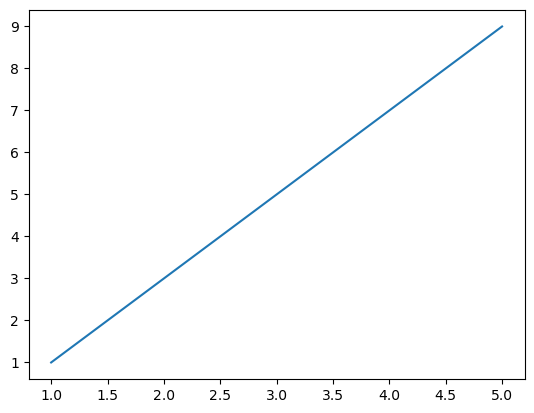

In [ ]:
plt.plot(
    X,
    y
)
plt.show()

In [ ]:
X2 = sm.add_constant(X)
print(X2)

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]


In [ ]:
# https://www.statsmodels.org/stable/glm.html
# https://www.statsmodels.org/stable/examples/notebooks/generated/glm.html

""" 
GLM
- takes in formula or arrays[need to add constant]
- formula: y ~ x1 + x2 + x1*x2 + np.log(x1)

"""

model = sm.GLM(
    y, 
    X2,
    # https://www.statsmodels.org/stable/glm.html#families
    family= sm.families.Gaussian()
    )
results = model.fit()
print(results.summary())

"""
Reminder!!!
- Scale:
- Log-Likelihood:
- Deviance: Measure of how good model is compared to over-fit one (lower is better)
- Pearson chi2: How well expected v.s. observed data's frequencies are statically significant.
- R^2: Proportion of variances (how much the output changes based on...) caused by the input variables.
- std err: How much the observed data deviates from model.
- z: How significant a predictor is. Tells you how many STD from the mean a value lies. 
- P>|z|: Probability of observing z compared to if were zero. (under 0.05 good)
- Link Function:
"""

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                    5
Model:                            GLM   Df Residuals:                        3
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                      1.0518e-30
Method:                          IRLS   Log-Likelihood:                 162.46
Date:                Fri, 28 Feb 2025   Deviance:                   1.7552e-29
Time:                        10:37:40   Pearson chi2:                 1.76e-29
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0000   1.08e-15   -9.3e+14      0.0

/opt/anaconda3/envs/matt/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/anaconda3/envs/matt/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/anaconda3/envs/matt/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)


"\nReminder!!!\n- Scale:\n- Log-Likelihood:\n- Deviance: Measure of how good model is compared to over-fit one (lower is better)\n- Pearson chi2: How well expected v.s. observed data's frequencies are statically significant.\n- R^2: Proportion of variances (how much the output changes based on...) caused by the input variables.\n- std err: How much the observed data deviates from model.\n- z: How significant a predictor is. Tells you how many STD from the mean a value lies. \n- P>|z|: Probability of observing z compared to if were zero. (under 0.05 good)\n- Link Function:\n"

### Back to data

In [ ]:
print(train_df.columns)

Index(['id', 'Age', 'Gender', 'Annual Income', 'Marital Status',
       'Number of Dependents', 'Education Level', 'Occupation', 'Health Score',
       'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age',
       'Credit Score', 'Insurance Duration', 'Policy Start Date',
       'Customer Feedback', 'Smoking Status', 'Exercise Frequency',
       'Property Type', 'Premium Amount', 'Freq'],
      dtype='object')


## Back to Frequency GLM

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
freq_formula = "Freq ~ Age + Q('Annual Income') + Q('Credit Score') + Gender + Q('Previous Claims')/Q('Insurance Duration')"
# freq_formula = "Freq ~ Q('Previous Claims')/Q('Insurance Duration')"

In [ ]:
freq_family= sm.families.Poisson()

In [ ]:
# https://www.statsmodels.org/dev/generated/statsmodels.formula.api.glm.html

# !!! forgot to add constant? !!!
model_freq = smf.glm(
    formula=freq_formula,
    data=train_df,
    family=freq_family
    ).fit()

"""
Reminder!!!
- Scale:
- Log-Likelihood:
- Deviance: Measure of how good model is compared to over-fit one (lower is better)
- Pearson chi2: How well expected v.s. observed data's frequencies are statically significant.
- R^2: Proportion of variances (how much the output changes based on...) caused by the input variables.
- std err: How much the observed data deviates from model.
- z: How significant a predictor is. Tells you how many STD from the mean a value lies. 
- P>|z|: Probability of observing z compared to if were zero. (under 0.05 good)
- Link Function:
"""

print(model_freq.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   Freq   No. Observations:              1200000
Model:                            GLM   Df Residuals:                  1199993
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -6.1318e+05
Date:                Fri, 28 Feb 2025   Deviance:                   1.8615e+05
Time:                        10:42:41   Pearson chi2:                 1.58e+05
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2394
Covariance Type:            nonrobust                                         
                                                   coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------